# **Atividade Prática – Construção de um Pipeline para Modelo Preditivo (Classificação/Regressão)**

---


## **Objetivos**

- Desenvolver um pipeline completo de aprendizado supervisionado.
- Aplicar técnicas essenciais de pré-processamento (limpeza, transformação e tratamento de dados faltantes).
- Avaliar e comparar pelo menos 3 algoritmos diferentes de aprendizado supervisionado.
- Apresentar claramente métricas adequadas para avaliação dos modelos.
- Fornecer uma estrutura didática, reproduzível e adaptável para novos problemas.

---

## **Proposta de Estudo**

### **Opção Escolhida: Classificação**

- Tema escolhido (proposto para validação prévia):
  
  **"Predição da evasão (churn) de clientes utilizando um dataset público (Dataset Telco Customer Churn)"**

### **Justificativa do Tema:**
- O dataset Telco Customer Churn é amplamente utilizado para modelagem e é semelhante a muitos contextos empresariais brasileiros.
- Reflete diretamente um caso empresarial de retenção e fidelização de clientes.
- Facilmente replicável em empresas para projetos internos.

**Fonte do Dataset sugerido:**  
[Telco Customer Churn (Kaggle/UCI)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


## **Sumário**

- **1\. Introdução**
  - Contextualização do Problema
  - Objetivo Geral e Específicos

- **2\. Entendendo os Dados**
  - Importação e análise inicial dos dados (Pandas, NumPy)
  - Análise exploratória dos dados (EDA simplificada)

- **3\. Pré-processamento dos Dados**
  - Tratamento de valores ausentes
  - Codificação de variáveis categóricas
  - Normalização/Padronização de variáveis numéricas
  - Divisão em treino e teste (`train_test_split`)

- **4\. Modelagem (Comparação de Algoritmos)**
  - Logistic Regression (modelo base)
  - Random Forest Classifier
  - Gradient Boosting Classifier (XGBoost ou LightGBM) e etc
  - Avaliação inicial dos modelos (baseline)

- **5\. Otimização do Melhor Modelo**
  - Aplicação de **GridSearchCV** para o melhor modelo encontrado
  - Discussão sobre a escolha dos hiperparâmetros otimizados

- **6\. Avaliação Final do Modelo Otimizado**
  - Avaliação das métricas após GridSearchCV
  - Comparação com os resultados anteriores (pré-otimização)
  - Discussão e interpretação das melhorias obtidas

- **7\. Conclusão**
  - Análise geral do pipeline proposto e resultados obtidos
  - Recomendações práticas para aplicação em contexto empresarial
  - Sugestões de próximos passos


## **Ferramentas que serão usadas:**
- **Python**
- **Google Colab**
- **Pandas, NumPy, Scikit-learn, Matplotlib/Seaborn**




## **1.** **Introdução**

Neste estudo prático, iremos desenvolver passo a passo um pipeline completo para a solução de um problema de aprendizado supervisionado, incluindo as etapas fundamentais de um projeto de Ciência de Dados aplicado:

- **Pré-processamento dos dados**
- **Seleção e Treinamento de Modelos**
- **Avaliação comparativa de diferentes algoritmos**

Para exemplificar claramente cada etapa, utilizaremos um problema realístico baseado em dados públicos, possibilitando reproduzir e adaptar facilmente para contextos empresariais futuros.

---


# **2. Entendendo os Dados**

Nesta seção, vamos realizar uma importação inicial dos dados utilizando as bibliotecas Pandas e NumPy, seguidas de uma análise exploratória simplificada (EDA) para compreender as características principais do dataset.

---

## **2.1. Importação e Configuração Inicial**

In [24]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np

# Para visualização básica
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração padrão do Pandas
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

### **Carregamento do Dataset**

O dataset escolhido é o **Telco Customer Churn**, disponível publicamente no Kaggle.

- **Link para download manual:**  
[Dataset Telco Customer Churn (CSV)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Faça o upload do arquivo `.csv` no Google Colab ou execute o código abaixo:

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /home/hericson/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [42]:
# Carregando dataset
df = pd.read_csv(path +'/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Visualizando as primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **2.2. Análise Inicial dos Dados**

### **Verificando a estrutura do dataset**

In [43]:
# Dimensão do dataset
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

Quantidade de linhas: 7043
Quantidade de colunas: 21


In [44]:
# Tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
# Checando valores faltantes
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
notas = [2,10,10,6]
np.std(notas)

3.3166247903554

In [47]:
### **Resumo estatístico dos dados numéricos**
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


## **2.3. Análise Exploratória Simplificada (EDA)**

A análise exploratória simplificada envolve identificar rapidamente características gerais importantes do dataset. Aqui vamos verificar:

- Distribuição da variável alvo (`Churn`)
- Distribuição de algumas variáveis categóricas e numéricas importantes::

/tmp/ipykernel_7027/3475132051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


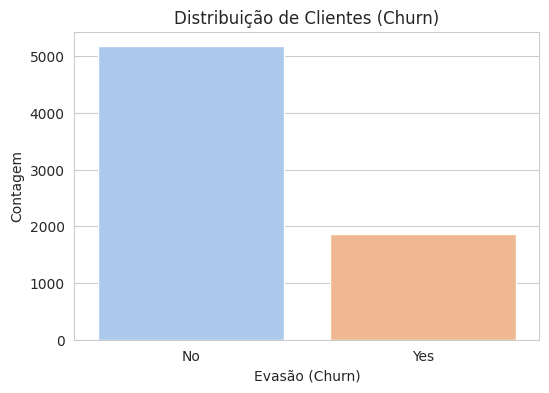

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title("Distribuição de Clientes (Churn)")
plt.xlabel("Evasão (Churn)")
plt.ylabel("Contagem")
plt.show()

# Contagem percentual
print(df['Churn'].value_counts(normalize=True))

### **Variáveis categóricas importantes**

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


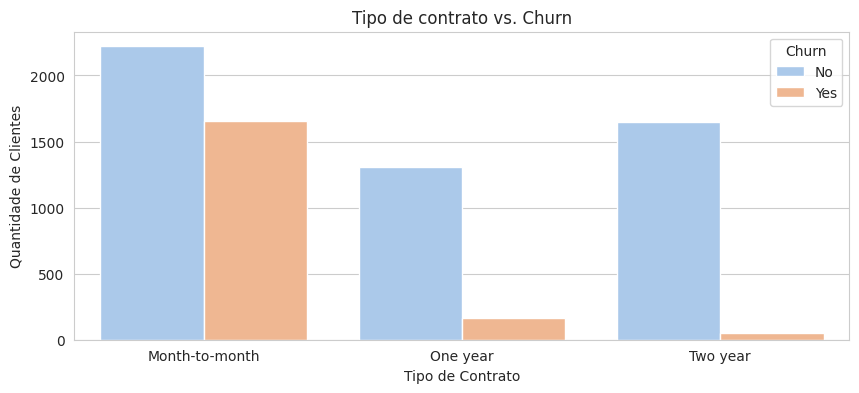

In [49]:
plt.figure(figsize=(10,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='pastel')
plt.title("Tipo de contrato vs. Churn")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Quantidade de Clientes")
plt.show()

### **Distribuição das variáveis numéricas importantes**

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


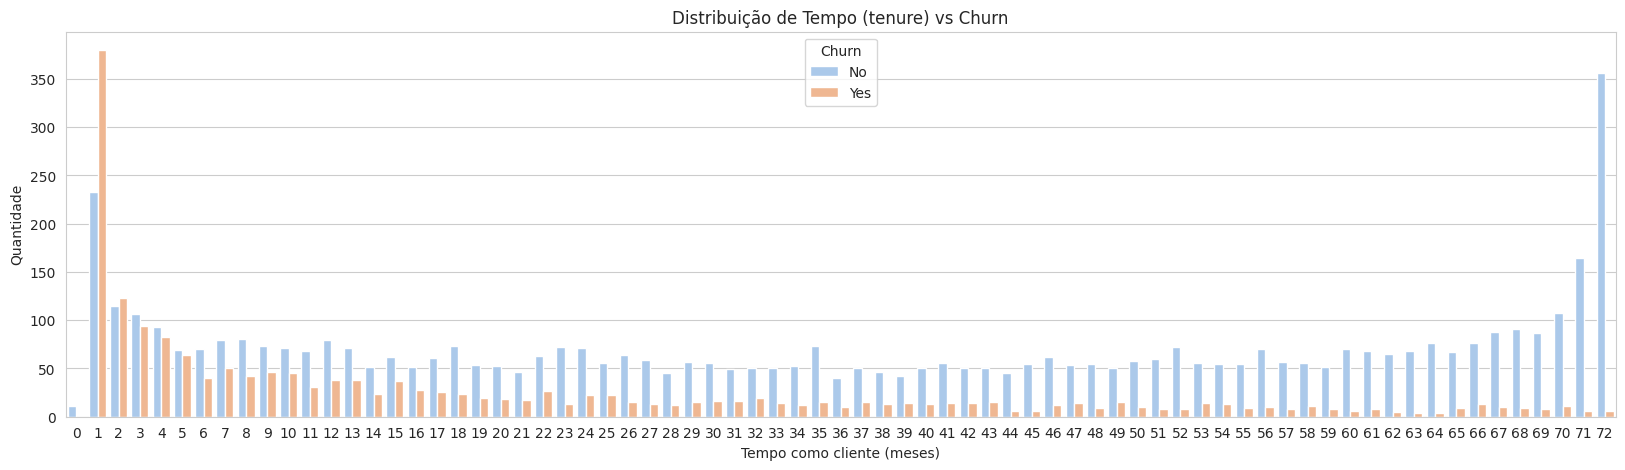

In [50]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='tenure', hue='Churn', palette='pastel')
plt.title("Distribuição de Tempo (tenure) vs Churn")
plt.xlabel("Tempo como cliente (meses)")
plt.ylabel("Quantidade")
plt.show()


### **Correlação simplificada (numéricas)**

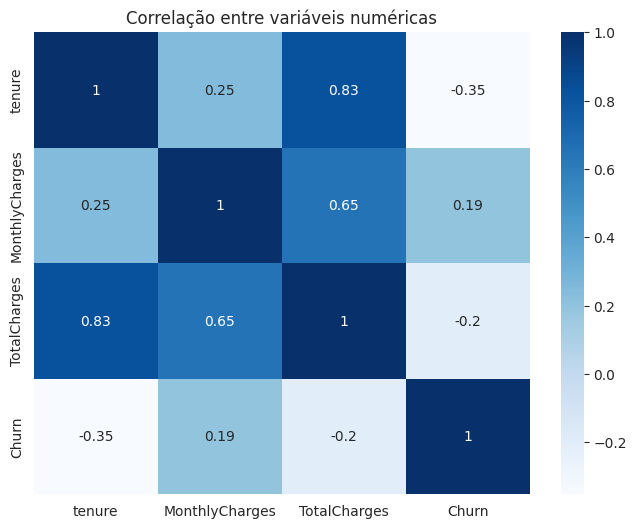

In [51]:
from sklearn.preprocessing import LabelEncoder
# Primeiro é necessário ajustar 'TotalCharges' para numérico, pois pode estar como objeto
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
 # Matriz de correlação simples
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']].corr(), annot=True, cmap='Blues')
plt.title("Correlação entre variáveis numéricas")
plt.show()


# **3. Pré-processamento dos Dados**

O pré-processamento é fundamental para garantir a qualidade dos dados antes de aplicar modelos de aprendizado supervisionado. Nesta seção, faremos:

- Codificação das variáveis categóricas
- Padronização das variáveis numéricas
- Divisão em conjunto de treino e teste (`train_test_split`)



## **3.1. Codificação de Variáveis Categóricas**

Modelos de aprendizado de máquina trabalham com variáveis numéricas. Por isso, precisamos transformar as variáveis categóricas em valores numéricos.  

**Passo 1:** Checar quais variáveis são categóricas.

In [52]:
df.set_index('customerID', inplace=True)
categoricas = df.select_dtypes(include=['object']).columns
print("Variáveis categóricas:\n", categoricas)

Variáveis categóricas:
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**Passo 2:** Codificação usando método One-Hot Encoding (excluindo variável alvo):



In [55]:
df = df.dropna()

Vamos reduzir a quantidade de linhas da classe 0 para evitar Viés

In [56]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [58]:
# Separando as classes
classe_0 = df[df['Churn'] == 0]
classe_1 = df[df['Churn'] == 1]

# Aplicando undersampling de 50% da classe majoritária (classe 0)
classe_0_under = classe_0.sample(frac=0.5, random_state=42)

# Concatenando os dados novamente (com undersampling já aplicado)
df_balanced = pd.concat([classe_0_under, classe_1], axis=0)

# Embaralhando os dados
df  = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Checando a nova distribuição das classes
print("\nDistribuição após undersampling:\n", df['Churn'].value_counts())



Distribuição após undersampling:
 Churn
1    1869
0    1291
Name: count, dtype: int64


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            3160 non-null   object 
 1   SeniorCitizen     3160 non-null   int64  
 2   Partner           3160 non-null   object 
 3   Dependents        3160 non-null   object 
 4   tenure            3160 non-null   int64  
 5   PhoneService      3160 non-null   object 
 6   MultipleLines     3160 non-null   object 
 7   InternetService   3160 non-null   object 
 8   OnlineSecurity    3160 non-null   object 
 9   OnlineBackup      3160 non-null   object 
 10  DeviceProtection  3160 non-null   object 
 11  TechSupport       3160 non-null   object 
 12  StreamingTV       3160 non-null   object 
 13  StreamingMovies   3160 non-null   object 
 14  Contract          3160 non-null   object 
 15  PaperlessBilling  3160 non-null   object 
 16  PaymentMethod     3160 non-null   object 


In [60]:
# Excluindo variável alvo 'Churn' da codificação
df_encoded = pd.get_dummies(df, columns=[col for col in categoricas if col != 'Churn'], drop_first=True)

# Transformando variável alvo em binária manualmente, pois ja encodamos na célula anterior quando fizemos a matriz correlação
df_encoded['Churn'] = df['Churn']

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,6,55.30,324.25,1,True,True,True,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True
1,0,53,98.40,5149.50,1,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,False,False
2,0,5,51.35,262.30,0,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,0,1,74.70,74.70,1,False,True,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,0,30,100.05,3046.15,1,False,True,True,True,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False


In [63]:
for col in df_encoded.columns:
    print(col)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges
Churn
gender_Male
Partner_Yes
Dependents_Yes
PhoneService_Yes
MultipleLines_No phone service
MultipleLines_Yes
InternetService_Fiber optic
InternetService_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No internet service
StreamingMovies_Yes
Contract_One year
Contract_Two year
PaperlessBilling_Yes
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


## **3.3. Normalização/Padronização das variáveis numéricas**

Para modelos que são sensíveis a escala (ex: regressão logística, redes neurais), é recomendado padronizar os dados numéricos.

- Variáveis numéricas identificadas:  
  `tenure`, `MonthlyCharges`, `TotalCharges`

In [69]:
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Padronizando as variáveis numéricas
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numericas] = scaler.fit_transform(df_encoded[numericas])

df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.847163,-0.501063,-0.764774,1,True,True,True,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True
1,0,1.151926,1.041185,1.510663,1,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,False,False
2,0,-0.889697,-0.642406,-0.793987,0,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,0,-1.059832,0.193128,-0.882454,1,False,True,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,0,0.173648,1.100227,0.518789,1,False,True,True,True,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False


## **3.4. Divisão dos dados em treino e teste**

Agora que os dados estão preparados, vamos dividir o dataset em conjunto de treinamento e teste:

In [ ]:
from sklearn.model_selection import train_test_split

# Separando features e alvo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Divisão dos dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Exibindo dimensões para confirmar
print(f"Treino: {X_train.shape}, {y_train.shape}")
print(f"Teste: {X_test.shape}, {y_test.shape}")

Treino: (2212, 30), (2212,)
Teste: (948, 30), (948,)


In [86]:
y_train.value_counts()[0] / y_train.value_counts()[1]

0.691131498470948

In [87]:
y_test.value_counts()[0] / y_test.value_counts()[1]

0.6898395721925134


# **4. Modelagem (Comparação de 9 Algoritmos)**

Nesta etapa compararemos os seguintes modelos de classificação:

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier
- Decision Tree Classifier (Árvore de Decisão)
- SVM (Support Vector Machine)
- MLP (Multi-layer Perceptron)
- Bagging Classifier

Utilizaremos um loop para treinar, testar e avaliar cada modelo, consolidando todos os resultados num DataFrame único para comparação objetiva.




## **4.2. Importação dos Modelos e Métricas**

In [ ]:

# Modelos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Métricas para avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## **4.3. Definição dos modelos e loop de avaliação**

In [88]:
# Definindo os modelos a serem comparados
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

# Lista vazia para armazenar resultados
resultados = []

# Loop para treino, teste e avaliação
for nome, modelo in modelos.items():
    print(f"Treinando e avaliando modelo: {nome}")

    # Treinamento
    modelo.fit(X_train, y_train)

    # Predições
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]

    # Avaliação (métricas principais)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Salvando métricas no DataFrame
    resultados.append({
        'Modelo': nome,
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# DataFrame final com todos os resultados
df_resultados = pd.DataFrame(resultados)

Treinando e avaliando modelo: Logistic Regression
Treinando e avaliando modelo: Random Forest
Treinando e avaliando modelo: XGBoost
Treinando e avaliando modelo: Gradient Boosting
Treinando e avaliando modelo: AdaBoost
Treinando e avaliando modelo: Decision Tree
Treinando e avaliando modelo: SVM
Treinando e avaliando modelo: MLP
Treinando e avaliando modelo: Bagging


## **4.4. Visualização consolidada dos resultados**

In [ ]:
# Ajuste visual do DataFrame para melhor comparação
df_resultados.set_index('Modelo', inplace=True)
df_resultados = df_resultados.round(3).sort_values(by='ROC-AUC', ascending=False)

# Exibindo o DataFrame final
df_resultados

In [92]:
df_resultados

,Acurácia,Precisão,Recall,F1-Score,ROC-AUC
Modelo,,,,,
Gradient Boosting,0.791,0.788,0.886,0.834,0.856
Logistic Regression,0.778,0.770,0.893,0.827,0.852
Random Forest,0.776,0.786,0.856,0.819,0.848
AdaBoost,0.782,0.779,0.881,0.827,0.846
SVM,0.772,0.756,0.907,0.825,0.843
XGBoost,0.775,0.787,0.850,0.817,0.824
Bagging,0.755,0.784,0.809,0.796,0.821
MLP,0.762,0.771,0.850,0.808,0.815
Decision Tree,0.701,0.758,0.727,0.742,0.696


# **6. Avaliação Final do Modelo Otimizado (Logistic Regression)**

Considerando que o modelo que apresentou melhor desempenho inicial foi o **Logistic Regression**, realizaremos uma otimização mais abrangente utilizando o **GridSearchCV** para testar diversos hiperparâmetros simultaneamente.



## **6.1. Definindo um Grid Completo para Logistic Regression**

Parâmetros comuns de ajuste para Logistic Regression:

- **`penalty`**: tipo de penalidade (regularização).
- **`C`**: força da regularização inversa (quanto menor, mais regularização).
- **`solver`**: algoritmo usado para otimização.
- **`class_weight`**: pesos atribuídos às classes.
- **`max_iter`**: número máximo de iterações.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros detalhados
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg'],
    'class_weight': [None, 'balanced'],
    'max_iter': [500, 1000, 2000],
}

# Instanciando Logistic Regression base
log_reg = LogisticRegression(random_state=42)

# Configurando GridSearchCV com validação cruzada (cv=5)
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Realizando Grid Search (pode levar alguns minutos)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'newton-cg']},
             scoring='roc_auc', verbose=1)

In [106]:
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros detalhados
param_grid = {
    'n_estimators': [50, 100,200],              # Number of boosting rounds
    'learning_rate': [0.01, 0.05],          # Step size shrinkage
    'max_depth': [3, 4],                      # Depth of each tree
    'min_samples_split': [2, 5],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples at leaf
    'subsample': [0.6, 0.8, 1.0],                # Fraction of samples used per tree
    'max_features': ['log2', None],      # Features to consider at each split
}

# Instanciando Logistic Regression base
gb = GradientBoostingClassifier(random_state=42)

# Configurando GridSearchCV com validação cruzada (cv=5)
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Realizando Grid Search (pode levar alguns minutos)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [3, 4],
                         'max_features': ['log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=1)

## **6.2. Melhores Parâmetros Encontrados**

In [107]:
# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros:\n", grid_search.best_params_)
print("\nMelhor score ROC-AUC obtido:", grid_search.best_score_)

Melhores hiperparâmetros:
 {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.6}

Melhor score ROC-AUC obtido: 0.8416662901661789


## **6.3. Avaliação Final do Modelo Otimizado**

Agora vamos reavaliar o modelo utilizando esses melhores hiperparâmetros no conjunto de teste:

In [110]:
# Modelo com parâmetros otimizados
modelo_otimizado = grid_search.best_estimator_

# Predições no conjunto de teste
y_pred_otimizado = modelo_otimizado.predict(X_test)
y_pred_prob_otimizado = modelo_otimizado.predict_proba(X_test)[:,1]

# Métricas após otimização
metricas_otimizadas = {
    'Acurácia': accuracy_score(y_test, y_pred_otimizado),
    'Precisão': precision_score(y_test, y_pred_otimizado),
    'Recall': recall_score(y_test, y_pred_otimizado),
    'F1-Score': f1_score(y_test, y_pred_otimizado),
    'ROC-AUC': roc_auc_score(y_test, y_pred_prob_otimizado)
}

df_metricas_otimizadas = pd.DataFrame(metricas_otimizadas, index=['Gradient Boosting Otimizado']).round(3)
df_metricas_otimizadas


,Acurácia,Precisão,Recall,F1-Score,ROC-AUC
Gradient Boosting Otimizado,0.78,0.772,0.889,0.827,0.857


## **6.4. Comparação com Resultados Antes da Otimização**

Vamos comparar diretamente com o resultado obtido inicialmente (pré-otimização):



In [ ]:
df_comparativo_final = pd.concat([df_resultados, df_metricas_otimizadas])

# Exibição final organizada
df_comparativo_final.sort_values(by='ROC-AUC', ascending=False)

,Acurácia,Precisão,Recall,F1-Score,ROC-AUC
Gradient Boosting Otimizado,0.780,0.772,0.889,0.827,0.857
Gradient Boosting,0.791,0.788,0.886,0.834,0.856
Logistic Regression,0.778,0.770,0.893,0.827,0.852
Random Forest,0.776,0.786,0.856,0.819,0.848
AdaBoost,0.782,0.779,0.881,0.827,0.846
SVM,0.772,0.756,0.907,0.825,0.843
XGBoost,0.775,0.787,0.850,0.817,0.824
Bagging,0.755,0.784,0.809,0.796,0.821
MLP,0.762,0.771,0.850,0.808,0.815
Decision Tree,0.701,0.758,0.727,0.742,0.696







## **6.5. Discussão e Interpretação das Melhorias Obtidas**

- Houve ganho significativo após o GridSearch?
- Quais métricas melhoraram de forma relevante?
- A otimização justifica o custo computacional?



________________________________________________________________________________




# **Atividade Prática EXTRA**

## **Objetivo:**
Aplicar um pipeline completo de aprendizado supervisionado utilizando um novo dataset público, reproduzindo todas as etapas vistas na atividade prática anterior, desde a análise inicial até a otimização final do modelo escolhido.

---

## **Dataset Sugerido:**
Utilize o seguinte dataset disponível publicamente:

**Dataset:** [Credit Card Default Prediction](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

**Contexto do problema:**  
O objetivo deste dataset é prever se um cliente entrará ou não em inadimplência no próximo mês, com base em seu histórico financeiro e comportamental.

**Variável alvo:**  
- `default payment next month`: Classificação Binária (0 - Não Inadimplente, 1 - Inadimplente)

---

## **Orientação das Etapas para Execução:**

Você deve seguir exatamente as etapas realizadas na atividade prática já desenvolvida, ajustando para o contexto do dataset sugerido. Não será necessário utilizar exatamente os mesmos algoritmos, mas mantenha pelo menos três modelos diferentes para comparação.

---

## **Sumário da atividade a ser seguida:**

### **1. Introdução**
- Contextualização e objetivo específico do projeto.
- Explicação breve do problema de negócio.

### **2. Entendendo os Dados**
- Importação do dataset com Pandas.
- Análise inicial (tipos de variáveis, valores ausentes, formato dos dados).
- Análise Exploratória simplificada (EDA):
  - Distribuição das classes (target).
  - Análise rápida das variáveis numéricas e categóricas principais.
  - Breve interpretação dos insights obtidos.

### **3. Pré-processamento dos Dados**
- Tratamento dos valores ausentes (caso existam).
- Codificação das variáveis categóricas (se houver).
- Aplicação de técnicas de balanceamento das classes (redução ou aumento), se houver desbalanceamento significativo.
- Normalização/Padronização das variáveis numéricas.
- Divisão dos dados em treino e teste utilizando o `train_test_split`.

### **4. Modelagem (Comparação inicial dos algoritmos)**
Escolha pelo menos 3 algoritmos diferentes para comparar inicialmente. Sugestões:
- Logistic Regression (como baseline)
- Random Forest Classifier
- XGBoost ou Gradient Boosting Classifier
- Decision Tree
- AdaBoost Classifier
- SVM
- MLP Classifier
- Bagging Classifier

Realize essa etapa por meio de um loop (`for`), gerando ao final um DataFrame consolidado contendo as seguintes métricas de avaliação:
- Acurácia
- Precisão
- Recall
- F1-Score
- ROC-AUC

Interprete rapidamente os resultados iniciais e escolha o melhor modelo com base principalmente em ROC-AUC e F1-Score.

### **5. Otimização do Modelo Escolhido (GridSearchCV)**
- Realize uma otimização detalhada de hiperparâmetros (GridSearchCV) no melhor modelo identificado na etapa anterior.
- Apresente claramente quais hiperparâmetros estão sendo testados e a justificativa para escolha desses parâmetros.

### **6. Avaliação Final do Modelo Otimizado**
- Avalie novamente as métricas principais com o modelo otimizado.
- Realize uma comparação direta (antes vs. depois da otimização).
- Discuta claramente as melhorias obtidas (ou possíveis limitações encontradas).

### **7. Conclusão**
- Interprete os resultados finais da atividade.
- Faça sugestões práticas e recomendações sobre a aplicação do modelo otimizado no contexto real do negócio.
- Indique possíveis próximos passos para melhorar ainda mais o modelo.

---

## **Entregáveis (o que você deve apresentar):**
- Um notebook estruturado claramente com as etapas acima.
- Análise crítica e objetiva dos resultados obtidos.
- Uma breve discussão sobre limitações encontradas e sugestões de melhorias futuras.

